# Advantage of relaxed SP definition

In this experiment, for a synthetic data set with a subset of designed SP and a number of spurrious (and very weak) SP occurences, we will show that our framework for a relaxed definition allows us to differentiate between the two groups of occurences

In [1]:
import pandas as pd
import detect_simpsons_paradox as dsp
import numpy as np
import string

For our evaluations, we will need a few different types of trend objects. The package provides dictionaries of default trend lists for ease of use of default settings

In [2]:
dsp.default_binary_trends

{'binary_rank': detect_simpsons_paradox.trends.binary_mean_rank_trend,
 'binary_sign': detect_simpsons_paradox.trends.binary_pearson_trend}

In [3]:
dsp.default_distance_trends

{'lin_reg': detect_simpsons_paradox.trends.linear_trend,
 'rank_trend': detect_simpsons_paradox.trends.mean_rank_trend}

In [4]:
# make a list of initialized objects from each
binary_trend_objs = [trend() for trend in dsp.default_binary_trends.values()]
distance_trend_objs = [trend() for trend in dsp.default_distance_trends.values()]
# print one to see that it's a list of initialized objects
binary_trend_objs

## Regression SP

First, we load a dataset as a labeledDataFrame object that has a number of continuous type regressions.  We will load it twice, one for the detection only case and one for the case with a continuous-valued distance. 

In [6]:
labeled_df_bin = dsp.labeledDataFrame('../data/synthetic_continuous_bin_compare')
labeled_df_dist = dsp.labeledDataFrame('../data/synthetic_continuous_bin_compare')

Next we compute the trends using only the binary types and view a sample of 10 random trends

In [7]:
view_sample_bin = labeled_df_bin.get_subgroup_trends_1lev(binary_trend_objs).sample(10)
view_sample_bin

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
1621,x3,x16,E,E4,positive,0.136834,binary_sign,negative,-0.039999
1188,x3,x5,E,E0,positive,0.128126,binary_sign,negative,-0.004234
406,x1,x12,D,D2,negative,-0.021878,binary_sign,negative,-0.033507
3560,x8,x16,C,C3,positive,0.360069,binary_sign,positive,0.043320
650,x2,x4,F,F0,negative,-0.128820,binary_sign,negative,-0.059132
2506,x5,x16,C,C2,positive,0.004087,binary_sign,negative,-0.022534
3545,x8,x15,G,G3,positive,0.132091,binary_sign,positive,0.069137
3504,x8,x14,G,G1,negative,-0.103131,binary_sign,positive,0.081496
203,x1,x7,C,C0,negative,-0.072601,binary_sign,positive,0.000186
309,x1,x9,H,H0,positive,0.110003,binary_sign,negative,-0.032812


Lets look a little at some of the trends that are found

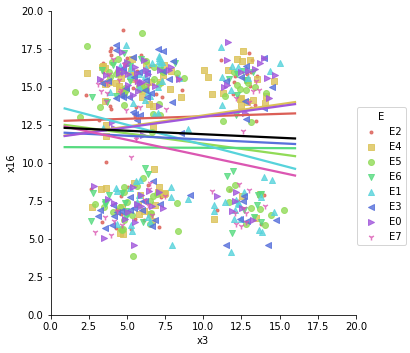

In [8]:
# look at the first of the random selection
view_to_plot = view_sample_bin.loc[view_sample_bin.index[0],['feat1','feat2','group_feat']]

labeled_df_bin.sp_plot(*view_to_plot)

and a view where we know there is strong SP

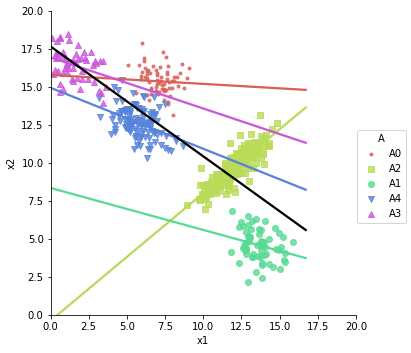

In [9]:

labeled_df_bin.sp_plot('x1','x2','A')

Next we compute the trends using the continuous trends,, and view a sample of 10 random trends

In [10]:
view_sample_dist = labeled_df_dist.get_subgroup_trends_1lev(distance_trend_objs).sample(10)
view_sample_dist

,feat1,feat2,group_feat,subgroup,subgroup_trend,subgroup_trend_quality,trend_type,agg_trend,agg_trend_quality
2308,x5,x11,B,B2,-0.011158,0.014813,lin_reg,-0.002661,0.003376
2597,x6,x8,E,E5,0.026919,0.046114,lin_reg,0.009321,0.017072
4155,x11,x13,E,E3,-0.224262,0.187802,lin_reg,0.061476,0.051950
4304,x12,x13,D,D0,-0.098920,0.058182,lin_reg,0.098147,0.059946
783,x2,x8,A,A3,-0.261033,0.144700,lin_reg,0.005721,0.010693
2411,x5,x13,G,G0,-0.001268,0.004981,lin_reg,0.060274,0.064613
58,x1,x3,E,E1,0.018389,0.021037,lin_reg,-0.003565,0.004136
3370,x8,x11,D,D2,0.019222,0.004795,lin_reg,0.181942,0.097199
704,x2,x6,A,A2,-0.190613,0.057581,lin_reg,0.033960,0.034655
1456,x3,x12,C,C5,-0.049615,0.071519,lin_reg,-0.043569,0.058101


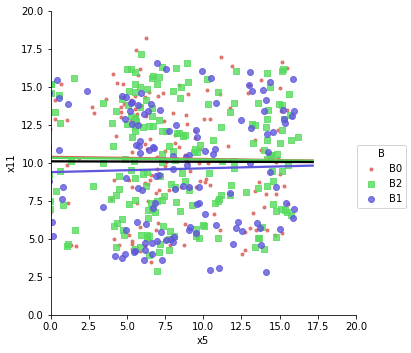

In [11]:
# look at the first of the random selection
view_to_plot = view_sample_dist.loc[view_sample_dist.index[0],['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)

Now, we can filter each table for Simpson's Paradox, using the default setting for each

In [12]:
bin_sp = labeled_df_bin.get_SP_rows()
print(len(bin_sp))
trend_q = .1
bin_det = bin_sp[np.abs(bin_sp['agg_trend_quality'])>trend_q].index
print(len(bin_det))

1659
44


We get a lot of reslts, but a lot are for weak trends

In [13]:
dist_sp = labeled_df_dist.get_SP_rows(thresh = .15)
print(len(dist_sp))
dist_det = dist_sp[np.abs(dist_sp['agg_trend_quality'])>trend_q].index
print(len(dist_det))

132
23


Many fewer, and with a threshold on aggregate trend strength, even fewer. We can visually inspect some of the trends that only the binary detector finds and that only the distance based finds

27


/home/smb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 26 + 1) instead
  """


feat1                              x9
feat2                             x15
group_feat                          E
subgroup                           E1
subgroup_trend               negative
subgroup_trend_quality    -0.00291208
trend_type                binary_sign
agg_trend                    positive
agg_trend_quality            0.145886
distance                            1
SP                               True
Name: 3802, dtype: object

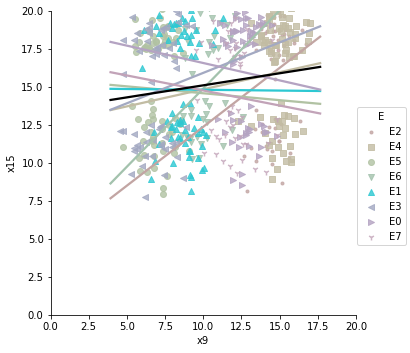

In [14]:
# unique to bin
bin_only= [b for b in bin_det if not(b in dist_det)]
print(len(bin_only))
# randomly select one
cursel = np.random.random_integers(len(bin_only)-1)

view_to_plot = labeled_df_bin.result_df.loc[bin_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_bin.result_df.loc[bin_only[cursel],'subgroup']

labeled_df_bin.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_bin.result_df.loc[bin_only[cursel]] #,'subgroup']

6


feat1                            x1
feat2                            x2
group_feat                        A
subgroup                         A0
subgroup_trend            -0.058639
subgroup_trend_quality    0.0534551
trend_type                  lin_reg
agg_trend                 -0.722544
agg_trend_quality          0.809255
distance                   0.180521
SP_thresh_0.15                 True
Name: 0, dtype: object

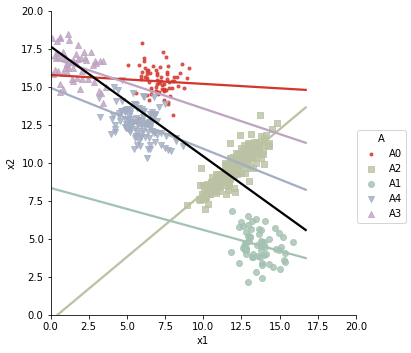

In [15]:
dist_only = [d for d in dist_det if not(d in bin_det)]
print(len(dist_only))
cursel = 0
view_to_plot = labeled_df_dist.result_df.loc[dist_only[cursel],['feat1','feat2','group_feat']]
bold_level = labeled_df_dist.result_df.loc[dist_only[cursel],'subgroup']

labeled_df_dist.sp_plot(*view_to_plot,bold_color_val=bold_level)
labeled_df_dist.result_df.loc[dist_only[cursel]]

The trends that only the distance finds are cases where the subgroup trend is the same sign as aggregate, but significantly different.  So, we find fewer overall and additional interesting trends that binary sign change cannot find. 

In [17]:
# we can check how many in each case were designed in, once we filter in the labeled df ro explose get views for a dtafram
n_view = 8
designed_view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]

found_sp_views_bin = labeled_df_bin.get_SP_views(colored=True)
found_sp_views_dist = labeled_df_dist.get_SP_views(thresh=.15,colored=True)

In [20]:
print('unplanned')
[v for v in found_sp_views_bin if not(v in designed_view_list)]

unplanned


[('x10', 'x16', 'E'),
 ('x6', 'x16', 'G'),
 ('x1', 'x4', 'D'),
 ('x5', 'x8', 'E'),
 ('x3', 'x5', 'A'),
 ('x3', 'x13', 'E'),
 ('x8', 'x11', 'C'),
 ('x2', 'x5', 'E'),
 ('x1', 'x5', 'E'),
 ('x7', 'x11', 'G'),
 ('x2', 'x9', 'C'),
 ('x5', 'x9', 'A'),
 ('x6', 'x10', 'G'),
 ('x6', 'x8', 'C'),
 ('x4', 'x6', 'C'),
 ('x9', 'x13', 'F'),
 ('x8', 'x9', 'D'),
 ('x1', 'x9', 'D'),
 ('x7', 'x16', 'F'),
 ('x1', 'x13', 'B'),
 ('x2', 'x14', 'A'),
 ('x8', 'x13', 'B'),
 ('x1', 'x5', 'H'),
 ('x1', 'x16', 'A'),
 ('x5', 'x7', 'C'),
 ('x5', 'x7', 'G'),
 ('x8', 'x12', 'G'),
 ('x12', 'x15', 'A'),
 ('x10', 'x16', 'G'),
 ('x6', 'x11', 'C'),
 ('x4', 'x6', 'F'),
 ('x1', 'x3', 'C'),
 ('x1', 'x7', 'E'),
 ('x6', 'x13', 'C'),
 ('x10', 'x11', 'A'),
 ('x6', 'x14', 'C'),
 ('x4', 'x8', 'D'),
 ('x10', 'x11', 'E'),
 ('x6', 'x10', 'F'),
 ('x5', 'x8', 'A'),
 ('x13', 'x16', 'H'),
 ('x7', 'x11', 'F'),
 ('x7', 'x14', 'A'),
 ('x2', 'x5', 'D'),
 ('x2', 'x3', 'F'),
 ('x4', 'x14', 'F'),
 ('x5', 'x16', 'A'),
 ('x11', 'x15', 'D'),
 ('x1'

# misc, probbably delete soon

In [ ]:
labeled_df_dist.sp_plot('x8','x9','E')
np.sum(labeled_df_dist.df['E']=='E7')

In [ ]:
labeled_df_dist.result_df[labeled_df_dist.result_df['distance']>30][:10]

In [ ]:
labeled_df_dist.get_trend_rows('x5','x6','C')

In [ ]:
view_to_plot = labeled_df_dist.result_df.loc[70,['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)

In [ ]:
# look at the first of the random selection
row_to_view = labeled_df_dist.result_df['distance'].argmax()
view_to_plot = labeled_df_dist.result_df.loc[row_to_view,['feat1','feat2','group_feat']]

labeled_df_dist.sp_plot(*view_to_plot)
labeled_df_dist.result_df.loc[row_to_view]

For the continuous-valued, we can futher filter 

## Rank SP

# Two types of SP